# Assignment - 02 DAI-101

## Introduction
This assignment demonstrates data analysis techniques to explore relationships within a dataset. By applying various data science methods, we gain insights that are applicable in real-world data analysis scenarios.

In [2]:

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and handling arrays
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization, built on top of matplotlib
from scipy import stats  # For scientific computations and statistical functions


from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # For linear regression models
from sklearn.tree import DecisionTreeRegressor  # For decision tree-based regression
from sklearn.ensemble import RandomForestRegressor  # For ensemble-based regression
from sklearn.svm import SVR  # For support vector regression
from sklearn.neighbors import KNeighborsRegressor  # For K-Nearest Neighbors regression


from sklearn.metrics import mean_squared_error, r2_score, accuracy_score  # For evaluating model performance


import statsmodels.api as sm  # For statistical models and hypothesis tests
from statsmodels.graphics.gofplots import qqplot  # For Q-Q plot visualization


## Data Overview
The dataset chosen for this assignment contains various features such as `total_bill`, `tip`, `sex`, `smoker`, `day`, `time`, and `size`. We begin by loading the data, displaying its structure, and then proceed to explore its statistical properties and relationships.

In [ ]:
df.describe()  # Summary statistics of numerical columns


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['total_bill'], kde=True)
plt.title('Total Bill Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['tip'], kde=True, color='orange')
plt.title('Tip Distribution')

plt.tight_layout()
plt.show()

In [2]:
df = pd.read_csv("tips (data for regression problem).csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Check for missing values
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)
df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


## Scatter Plot

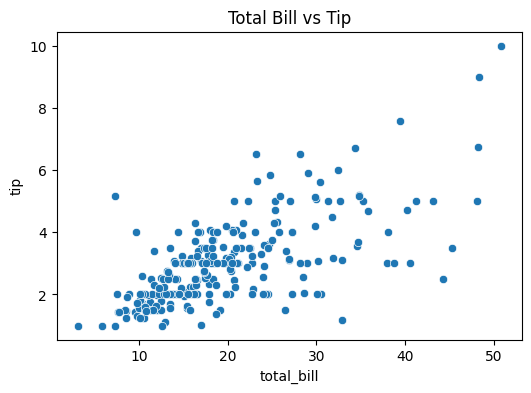

In [5]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Total Bill vs Tip")
plt.show()

## Pair plot

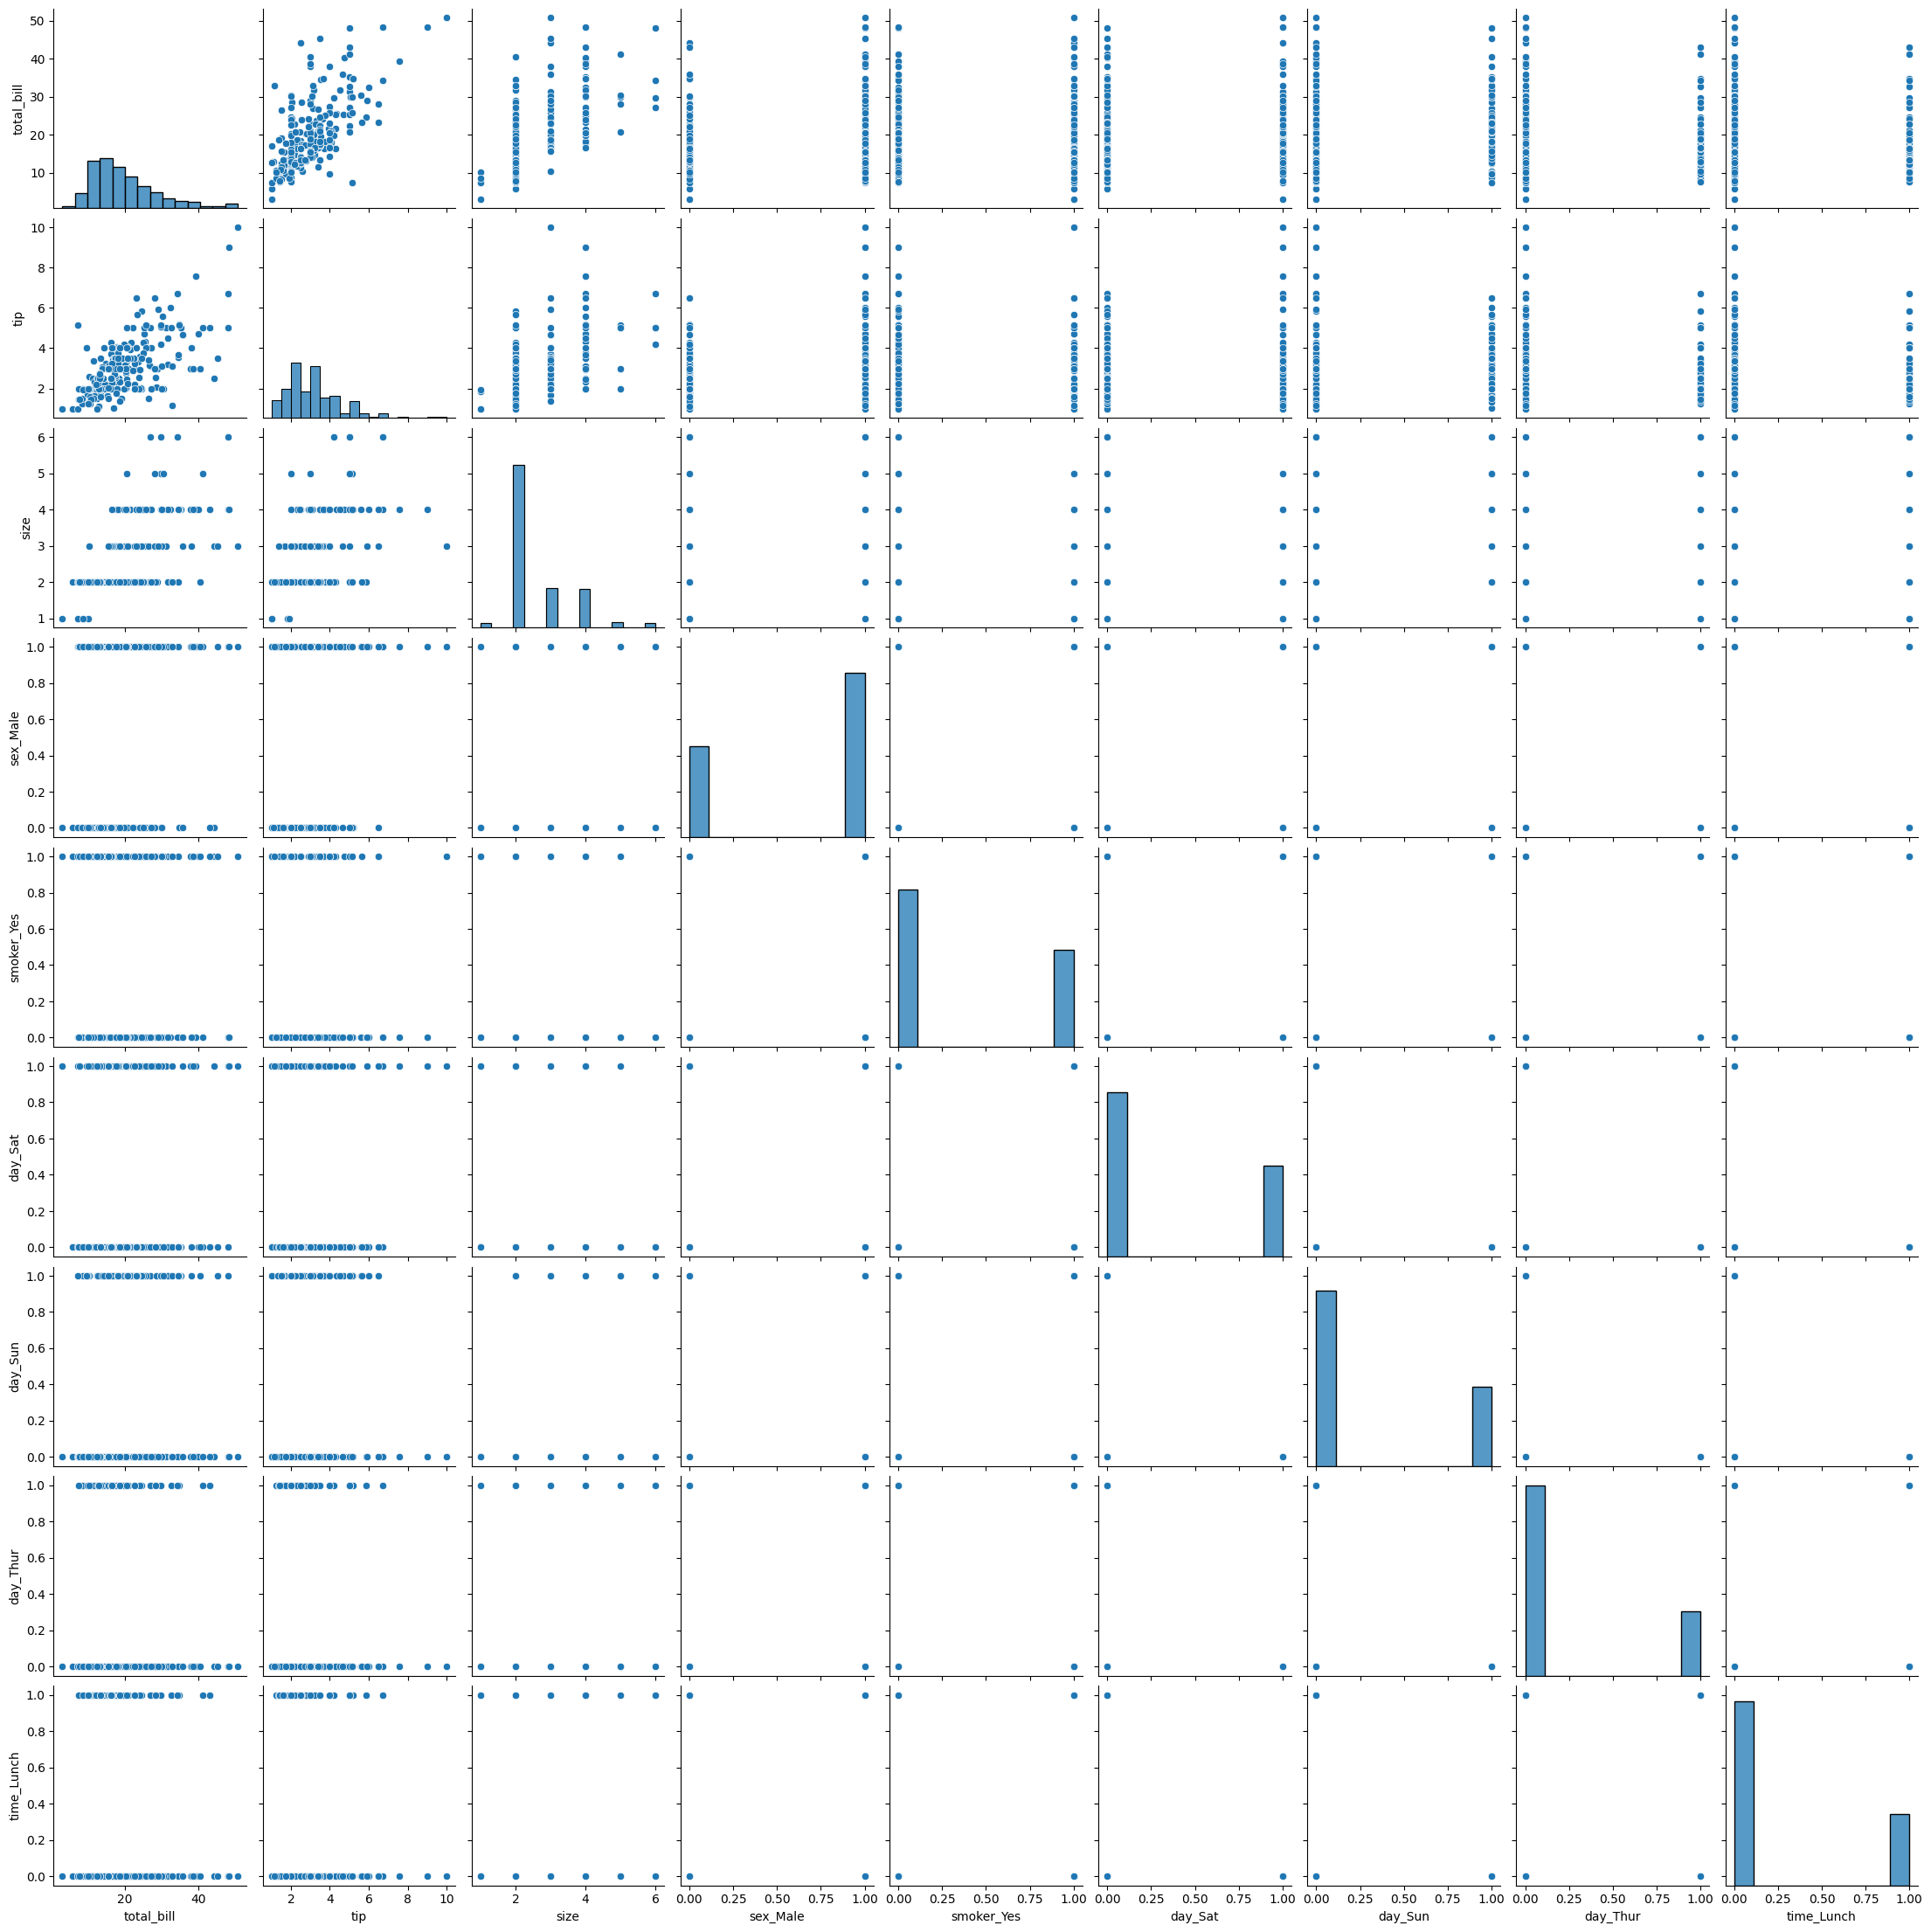

In [6]:
sns.pairplot(df)
plt.show()

## Correlation matrix (Heatmap)

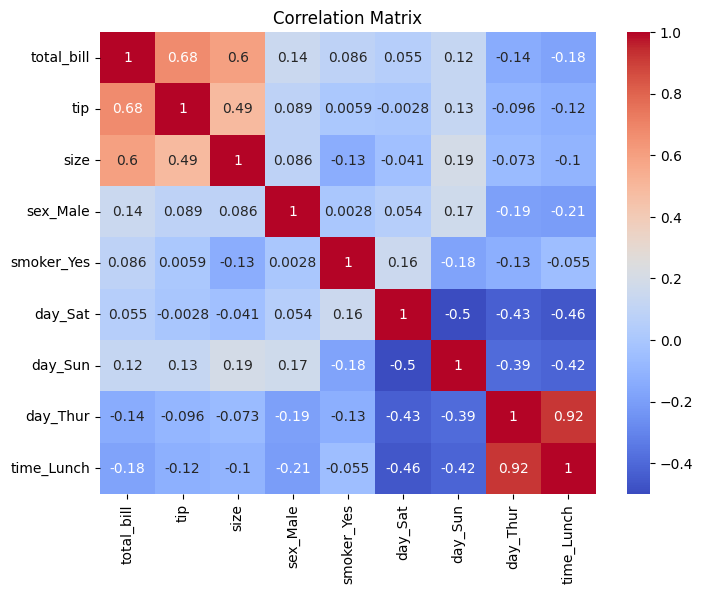

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Statistical Tests for Linearity (Rainbow Test)

Rainbow Test Statistic: 1.2291480226129028
Rainbow Test p-value: 0.12911921525513964


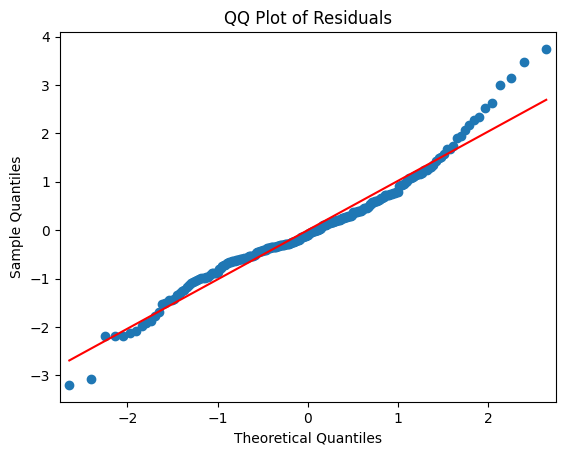

Fail to reject the null hypothesis - the model appears linear.


In [8]:
# Rainbow Test for Linearity
X = sm.add_constant(df['total_bill']) 
y = df['tip']

# Fitting an OLS regression model
model = sm.OLS(y, X).fit()

rainbow_stat, rainbow_p_value = sm.stats.linear_rainbow(model)
print(f"Rainbow Test Statistic: {rainbow_stat}")
print(f"Rainbow Test p-value: {rainbow_p_value}")

qqplot(model.resid, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

# Interpretation
if rainbow_p_value > 0.05:
    print("Fail to reject the null hypothesis - the model appears linear.")
else:
    print("Reject the null hypothesis - the model may not be linear.")

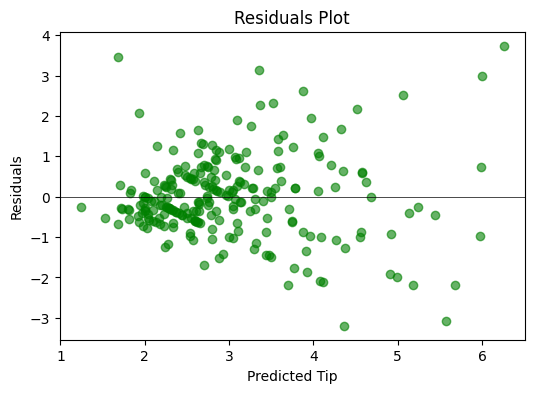

In [9]:
# Residuals plot to check for linearity
X = df[['total_bill']]
y = df['tip']
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(6, 4))
plt.scatter(predictions, residuals, color="g", alpha=0.6)
plt.axhline(0, color='black', linewidth=0.5)
plt.title("Residuals Plot")
plt.xlabel("Predicted Tip")
plt.ylabel("Residuals")
plt.show()

## Line Plot (for time-series data)

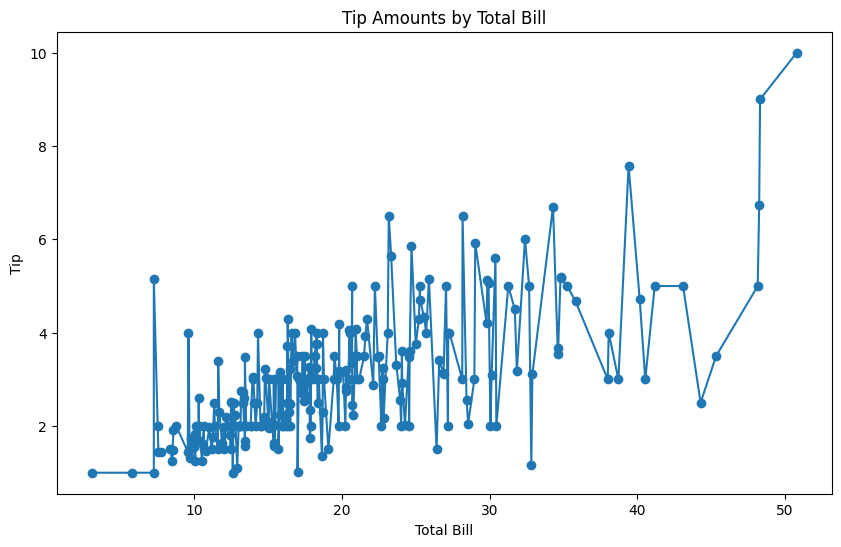

In [10]:
# Sorting data by total bill for line plot (as a stand-in for time series)
sorted_data = df.sort_values(by='total_bill')
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['total_bill'], sorted_data['tip'], marker='o', linestyle='-')
plt.title("Tip Amounts by Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

## Using Regression Techniques

### Assigning all columns except "tips" to the input variable

In [11]:
# Splitting the data into training and testing sets
X = df.drop("tip", axis=1)
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {
    "Model": [],
    "R2 Score": [],
    "Accuracy Score": []
}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.round(), y_pred.round())
    results["Model"].append(name)
    results["R2 Score"].append(r2)
    results["Accuracy Score"].append(accuracy)
    print(f"{name} - R2 Score: {r2}, Accuracy Score: {accuracy}")

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model("Ridge Regression", ridge, X_test, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_model("Lasso Regression", lasso, X_test, y_test)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree Regression", dt, X_test, y_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest Regression", rf, X_test, y_test)

# Support Vector Regression
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
evaluate_model("Support Vector Regression", svr, X_test, y_test)

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model("K-Nearest Neighbors Regression", knn, X_test, y_test)

results_df = pd.DataFrame(results)
print(results_df)

Linear Regression - R2 Score: 0.43730181943482505, Accuracy Score: 0.40816326530612246
Ridge Regression - R2 Score: 0.4393889716178486, Accuracy Score: 0.40816326530612246
Lasso Regression - R2 Score: 0.5273068720881755, Accuracy Score: 0.40816326530612246
Decision Tree Regression - R2 Score: -0.004178121600921791, Accuracy Score: 0.42857142857142855
Random Forest Regression - R2 Score: 0.2642455218065466, Accuracy Score: 0.3877551020408163
Support Vector Regression - R2 Score: 0.032004924105307975, Accuracy Score: 0.32653061224489793
K-Nearest Neighbors Regression - R2 Score: 0.29888587066985495, Accuracy Score: 0.3877551020408163
                            Model  R2 Score  Accuracy Score
0               Linear Regression  0.437302        0.408163
1                Ridge Regression  0.439389        0.408163
2                Lasso Regression  0.527307        0.408163
3        Decision Tree Regression -0.004178        0.428571
4        Random Forest Regression  0.264246        0.387755


### Assigning "size" and "total_bill" columns to the input variable

In [12]:
# Splitting the data into training and testing sets
X = df[["size", "total_bill"]]
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {
    "Model": [],
    "R2 Score": [],
    "Accuracy Score": []
}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.round(), y_pred.round())
    results["Model"].append(name)
    results["R2 Score"].append(r2)
    results["Accuracy Score"].append(accuracy)
    print(f"{name} - R2 Score: {r2}, Accuracy Score: {accuracy}")

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model("Ridge Regression", ridge, X_test, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_model("Lasso Regression", lasso, X_test, y_test)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree Regression", dt, X_test, y_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest Regression", rf, X_test, y_test)

# Support Vector Regression
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
evaluate_model("Support Vector Regression", svr, X_test, y_test)

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model("K-Nearest Neighbors Regression", knn, X_test, y_test)

results_df = pd.DataFrame(results)
print(results_df)

Linear Regression - R2 Score: 0.4811084097989491, Accuracy Score: 0.3673469387755102
Ridge Regression - R2 Score: 0.4818828773627841, Accuracy Score: 0.3673469387755102
Lasso Regression - R2 Score: 0.527306163508685, Accuracy Score: 0.40816326530612246
Decision Tree Regression - R2 Score: 0.1962183089778119, Accuracy Score: 0.3673469387755102
Random Forest Regression - R2 Score: 0.3317225587215824, Accuracy Score: 0.4489795918367347
Support Vector Regression - R2 Score: 0.3654420234056607, Accuracy Score: 0.3673469387755102
K-Nearest Neighbors Regression - R2 Score: 0.4050596025324963, Accuracy Score: 0.32653061224489793
                            Model  R2 Score  Accuracy Score
0               Linear Regression  0.481108        0.367347
1                Ridge Regression  0.481883        0.367347
2                Lasso Regression  0.527306        0.408163
3        Decision Tree Regression  0.196218        0.367347
4        Random Forest Regression  0.331723        0.448980
5       Sup

### Checking the feature importance using the lasso regression model

In [13]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Getting feature names and their corresponding coefficients
feature_importance = pd.Series(lasso.coef_, index=X_train.columns)

feature_importance = feature_importance[feature_importance != 0] #excluding features with zero coefficients
feature_importance = feature_importance.sort_values(key=abs, ascending=False)
print("Feature Importance in Lasso Regression:")
print(feature_importance)

Feature Importance in Lasso Regression:
size          0.108086
total_bill    0.099098
dtype: float64


### Assigning "total_bill" column to the input variable

In [14]:
# Splitting the data into training and testing sets
X = df[["total_bill"]]
y = df["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {
    "Model": [],
    "R2 Score": [],
    "Accuracy Score": []
}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test.round(), y_pred.round())
    results["Model"].append(name)
    results["R2 Score"].append(r2)
    results["Accuracy Score"].append(accuracy)
    print(f"{name} - R2 Score: {r2}, Accuracy Score: {accuracy}")

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr, X_test, y_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
evaluate_model("Ridge Regression", ridge, X_test, y_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
evaluate_model("Lasso Regression", lasso, X_test, y_test)

# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
evaluate_model("Decision Tree Regression", dt, X_test, y_test)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model("Random Forest Regression", rf, X_test, y_test)

# Support Vector Regression
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)
evaluate_model("Support Vector Regression", svr, X_test, y_test)

# K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model("K-Nearest Neighbors Regression", knn, X_test, y_test)

results_df = pd.DataFrame(results)
print(results_df)

Linear Regression - R2 Score: 0.5449381659234663, Accuracy Score: 0.42857142857142855
Ridge Regression - R2 Score: 0.5449458342338539, Accuracy Score: 0.42857142857142855
Lasso Regression - R2 Score: 0.5462147597181777, Accuracy Score: 0.4489795918367347
Decision Tree Regression - R2 Score: -0.06898287247700985, Accuracy Score: 0.30612244897959184
Random Forest Regression - R2 Score: 0.19370766751511703, Accuracy Score: 0.40816326530612246
Support Vector Regression - R2 Score: 0.1135145943220236, Accuracy Score: 0.3877551020408163
K-Nearest Neighbors Regression - R2 Score: 0.4545453410143979, Accuracy Score: 0.3673469387755102
                            Model  R2 Score  Accuracy Score
0               Linear Regression  0.544938        0.428571
1                Ridge Regression  0.544946        0.428571
2                Lasso Regression  0.546215        0.448980
3        Decision Tree Regression -0.068983        0.306122
4        Random Forest Regression  0.193708        0.408163
5    

In [ ]:
Conclusion

Key Factors Influencing Tips:

Several tests were conducted to improve the R² score and accuracy score. Initially, the input variable X included all columns except "tips," which resulted in an R² score of 0.527307 and an accuracy score of 0.408163. Later, when X was limited to the columns "size" and "total_bill," the scores remained nearly the same, with an R² of 0.527306 and an accuracy of 0.408163. Finally, when only the "total_bill" column was used as the input variable, the model achieved its highest R² score (0.546215) and accuracy score (0.448980). Across all scenarios, Lasso Regression performed the best, identifying "total_bill" as the most significant factor influencing tips.


Model Performance:

Lasso Regression outperformed other models, delivering the highest R² score (0.546215) and the best accuracy score, making it the most reliable model for predicting tip amounts.

Ridge Regression and Linear Regression also showed competitive results, with R² values of 0.544938 and 0.544946, respectively.

Other models, such as Decision Tree, Random Forest, SVR, and KNN, had significantly lower R² scores, proving to be less effective with this dataset.


Recommendations for Management:

Since "total_bill" has the strongest influence on tips, businesses should focus on encouraging higher customer spending by offering discounts on premium items or creating high-value promotional deals.

Training staff on the relationship between bill amounts and tips can help them employ strategic upselling techniques, increasing both revenue and tip amounts effectively.